## Demo: Truncating Fourier Series & The Gibbs Phenomenon

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from scipy.optimize import minimize

In this demo we examine an unexpected breed of error that arises from truncating the Fourier series of a *discontinuous* function. We focus on the $2\pi$-periodic extension of 
$$ f(x) = x \quad \forall \ x\in [-\pi,\pi],$$ denoted $\widetilde{f}(x) \left(x\in \mathbb{R}\right)$. Clearly, $\widetilde{f}(x)$ has a jump discontinuity at each nonzero integer multiple of $\pi$.  We shall find that any truncation of the Fourier series of $\tilde{f}$ exhibits sharp oscillations with relatively high amplitudes near the jump discontinuities: this is known as the **Gibbs phenomenon**. 

First, we define the $N^{\text{th}}$ partial sum of our Fourier series, which is 
$$ S_{N}(x) = 2\sum_{k=1}^{N}\frac{(-1)^{k+1}}{k} \sin\left(kx\right). $$ 

In [2]:
def S(x,N): # partial sum of Fourier series of f(x)=x on (-pi,pi). See Strauss p.109-110
    
    sum = 0
    
    for k in np.array(range(1,N+1)):
        
            sum += -2.*((-1)**k)*(1/k)*np.sin(k*x)

    return sum 

It's easy to plot the absolute error $|S_{n}(x)-x|$ for $x\in [-\pi,\pi]$ with the aid of a plotting helper from https://stackoverflow.com/questions/40642061/how-to-set-axis-ticks-in-multiples-of-pi-python-matplotlib . 

In [3]:
def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

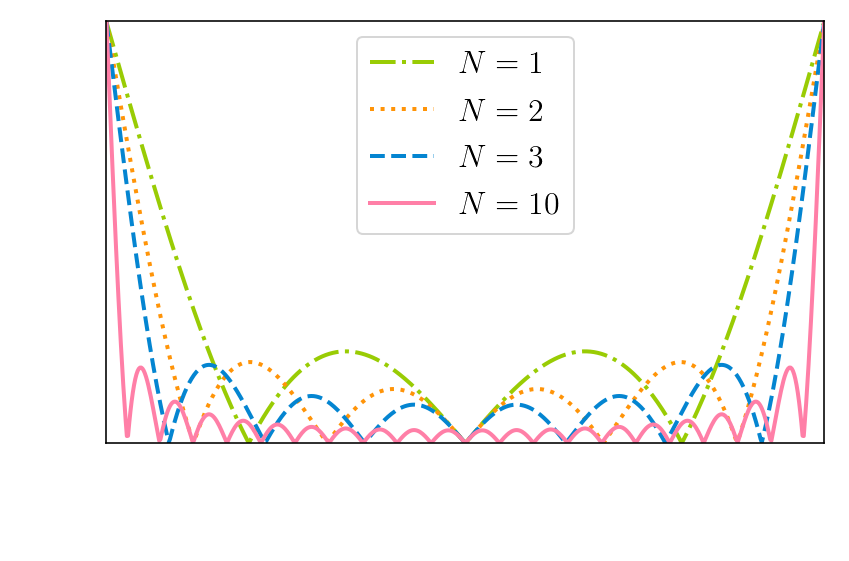

In [8]:
fig, ax =plt.subplots()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
    
xx = np.linspace(-np.pi,np.pi,600)

data_1 = S(xx, 1)

data_2 = S(xx, 2)

data_3 = S(xx, 3)

data_10 = S(xx, 10)

oneline, = plt.plot(xx, np.abs(data_1-xx), color='xkcd:slime green', linewidth='2', linestyle='dashdot', label='$N=1$')
twoline, = plt.plot(xx, np.abs(data_2-xx), color='xkcd:tangerine', linewidth='2',linestyle='dotted', label='$N=2$')
threeline, = plt.plot(xx, np.abs(data_3-xx), color='xkcd:cerulean', linewidth='2',linestyle='dashed', label='$N=3$')
tenline, = plt.plot(xx, np.abs(data_10-xx), color='xkcd:carnation pink', linewidth='2',linestyle='solid', label='$N=10$')

plt.xlim([-np.pi, np.pi])
plt.ylim([0., np.pi+.01])

plt.xlabel(r"$x$", fontsize=26, color = 'w')

#from matplotlib.ticker import FormatStrFormatter
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.ylabel(r"$\left|S_{N}(x)-x\right|$", fontsize=26, color='w')
plt.tick_params(axis='x', which='both', top='off', color = 'w')
plt.xticks(fontsize=20, rotation=0, color = 'w')
plt.tick_params(axis='y', which='both', right='off', color = 'w')
plt.yticks(fontsize=20, rotation=0, color = 'w')
ax.locator_params(axis='y', nbins=6)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi))
#ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
#ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))


ax.legend(fontsize=16)

plt.tight_layout()
    
plt.show()
#"""

So, even before we worry about the periodic extension of $f$, we find the Fourier series is already exhibiting convergence issues. This is because $S_{N}(x)$ only involves sine terms (the function we seek to expand is odd), but these vanish at the boundary of $[-\pi,\pi]$. Therefore, any truncation of the Fourier series will not agree with $f$ at $\pm \pi$. 

Next, we plot the $2\pi$-periodic extension of $x$ from $[-\pi,\pi]$ to $\mathbb{R}$, denoted $\widetilde{f}$: 

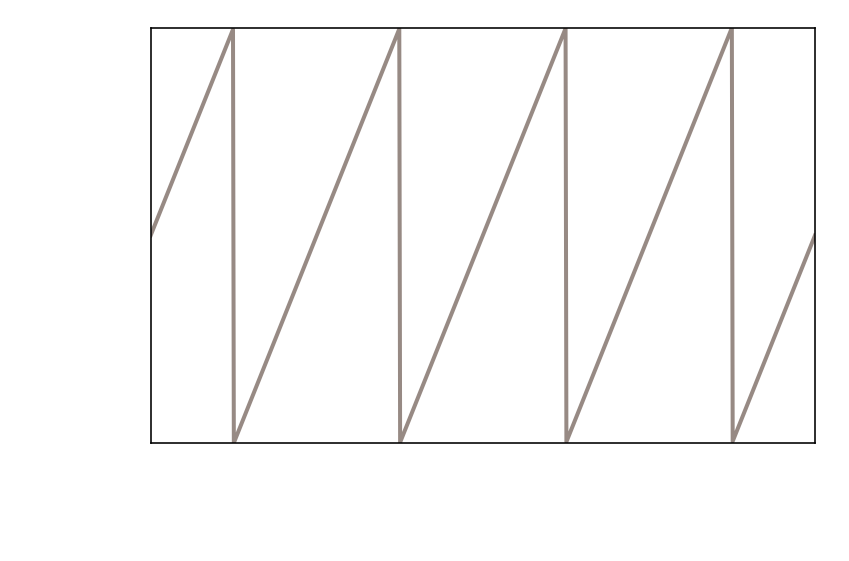

In [5]:
fig, ax =plt.subplots()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
    
n_periods = 4

xx = np.linspace(-n_periods*np.pi,n_periods*np.pi, np.int(n_periods*200))

plt.plot(xx, (xx+np.pi) %(2*np.pi) - np.pi, color='xkcd:warm grey', linewidth='2')

plt.xlim([-n_periods*np.pi, n_periods*np.pi])
plt.ylim([-np.pi, np.pi])

plt.xlabel(r"$x$", fontsize=26, color = 'w')

#from matplotlib.ticker import FormatStrFormatter
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.ylabel(r"$\widetilde{f}$", fontsize=26, color='w')
plt.tick_params(axis='x', which='both', top='off', color = 'w')
plt.xticks(fontsize=20, rotation=0, color = 'w')
plt.tick_params(axis='y', which='both', right='off', color = 'w')
plt.yticks(fontsize=20, rotation=0, color = 'w')
ax.locator_params(axis='y', nbins=6)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi))
ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

plt.tight_layout()
    
plt.show()
#"""

Finally, we plot the truncated Fourier series $S_{N}(x)$. Naively, we expect that this should give a good approximation to $\widetilde{f}$. 

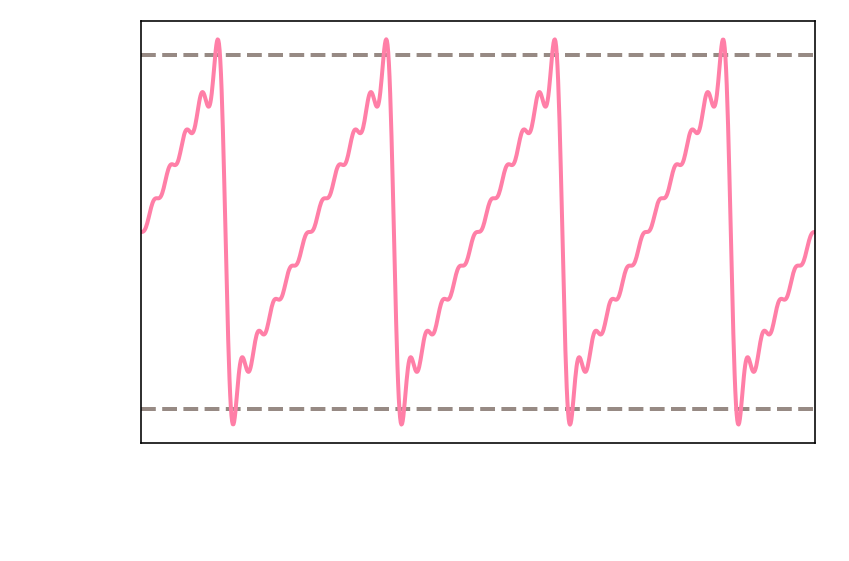

In [6]:
fig, ax =plt.subplots()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
    
n_periods = 4

xx = np.linspace(-n_periods*np.pi,n_periods*np.pi, np.int(n_periods*256))

plt.plot(xx, np.pi*np.ones_like(xx), color='xkcd:warm grey', linewidth='2', linestyle='dashed')
plt.plot(xx, -np.pi*np.ones_like(xx), color='xkcd:warm grey', linewidth='2', linestyle='dashed')

N=10

uu = S(xx, N)

plt.plot(xx, uu, color='xkcd:carnation pink', linewidth='2')

plt.xlim([-n_periods*np.pi, n_periods*np.pi])
plt.ylim([-np.pi-0.6, np.pi+.6])

plt.xlabel(r"$x$", fontsize=26, color = 'w')

#from matplotlib.ticker import FormatStrFormatter
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.ylabel(r"$S_{%i}(x)$" % N, fontsize=26, color='w')
plt.tick_params(axis='x', which='both', top='off', color = 'w')
plt.xticks(fontsize=20, rotation=0, color = 'w')
plt.tick_params(axis='y', which='both', right='off', color = 'w')
plt.yticks(fontsize=20, rotation=0, color = 'w')
ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi))
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
#ax.locator_params(axis='y', nbins=6)

plt.tight_layout()
    
plt.show()
#"""

Increasing the parameter $N$ in the above picture, we can clearly see sharp oscillations develop near the points of discontinuity $k\pi (k\neq 0)$. This is the Gibbs phenomenon! We can compute the percent difference between the partial sum plotted and $f(x)=x$ to the left of each jump at $x=\pi$ (one must be careful because the partial sum changes so rapidly here). 

In [7]:
S_near = np.max(uu)

#TODO: can optimization help automate the computation of the max for any N? Without a naive 
# search of the sample values? Oscillation of the S_N makes this very difficult! 

rel_error = np.abs(S_near-np.pi)/np.abs(np.pi)

print('Percent Relative Error =', 100*rel_error)

Percent Relative Error = 8.669250818212245


Thus we can roughly empirically check that the error is around $10\%-20\%$. This is approximately consistent with Gibb's error estimate of $\approx 10\%$. 

Around $N=100$ or so, rounding errors can mess up the picture a bit (the overshoot varies from period to period), so use the demo with caution. 